In [1]:
%matplotlib inline

import matplotlib.pyplot as plt

import pandas as pd

In [2]:
city_data_to_load = "Resources/city_data.csv"

ride_data_to_load = "Resources/ride_data.csv"

In [3]:
city_data_df = pd.read_csv(city_data_to_load)

city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
ride_data_df = pd.read_csv(ride_data_to_load)

ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [5]:
# Get rows and columns with data

city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [6]:
# check for null values

city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [7]:
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [8]:
#Gather unique city type

city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [9]:
sum(city_data_df["type"]=="Urban")


66

In [10]:
sum(city_data_df["type"]=="Rural")

18

In [11]:
sum(city_data_df["type"]=="Suburban")

36

In [12]:
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [13]:
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [14]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [15]:
# Combine the data into a single dataset

pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city","city"])

pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [16]:
# Create Urban dataframe
urban_cities_df = pyber_data_df[pyber_data_df["type"] =="Urban"]

urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [18]:
# Create suburban and rural dataframes

suburban_cities_df = pyber_data_df[pyber_data_df["type"] =="Suburban"]

rural_cities_df = pyber_data_df[pyber_data_df["type"] =="Rural"]

rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [19]:
# Get the number of rides

urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]

suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]

rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

In [20]:
# Get the average fare for each city

urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]

suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]

rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

In [21]:
# Get the average number of drivers for each city

urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]

suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]

rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

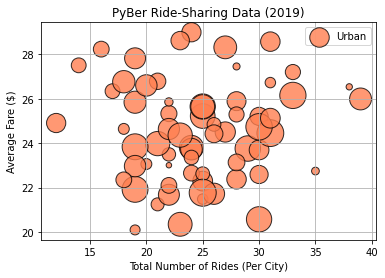

In [23]:
# Urban Scatter Plot

plt.scatter(urban_ride_count,
            urban_avg_fare,
            s=10*urban_driver_count,
            c="coral",
            edgecolor="black",
            linewidth=1,
            alpha=0.8,
            label="Urban")

plt.title("PyBer Ride-Sharing Data (2019)")

plt.ylabel("Average Fare ($)")

plt.xlabel("Total Number of Rides (Per City)")

plt.grid(True)

plt.legend()

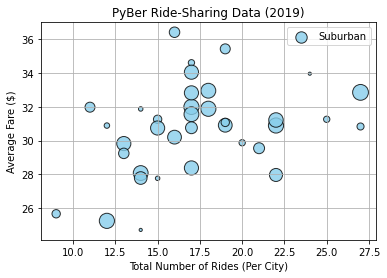

In [26]:
# Suburban Scatter Plot

plt.scatter(suburban_ride_count,
            suburban_avg_fare,
            s=10*suburban_driver_count,
            c="skyblue",
            edgecolor="black",
            linewidth=1,
            alpha=0.8,
            label="Suburban")

plt.title("PyBer Ride-Sharing Data (2019)")

plt.ylabel("Average Fare ($)")

plt.xlabel("Total Number of Rides (Per City)")

plt.grid(True)

plt.legend()

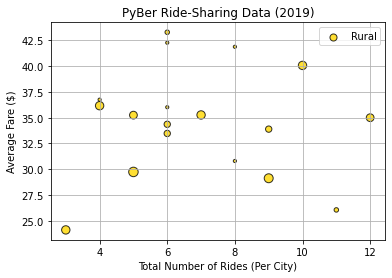

In [25]:
# Rural Scatter Plot

plt.scatter(rural_ride_count,
            rural_avg_fare,
            s=10*rural_driver_count,
            c="gold",
            edgecolor="black",
            linewidth=1,
            alpha=0.8, 
            label = "Rural")

plt.title("PyBer Ride-Sharing Data (2019)")

plt.ylabel("Average Fare ($)")

plt.xlabel("Total Number of Rides (Per City)")

plt.grid(True)

plt.legend()

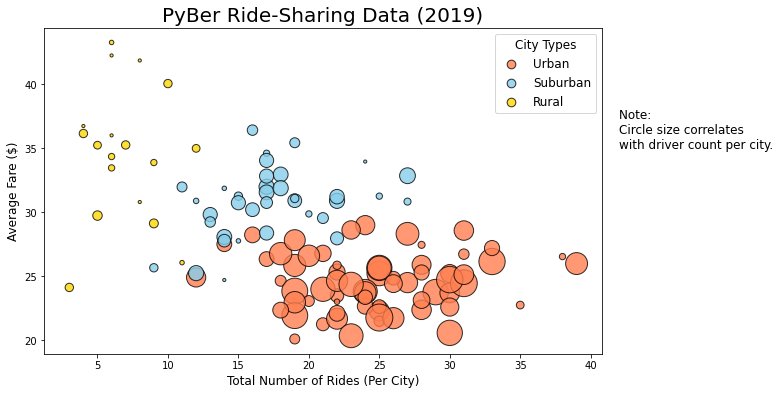

In [34]:
# Scatter Plot for each type

plt.subplots(figsize=(10, 6))

plt.scatter(urban_ride_count,
            urban_avg_fare,
            s=10*urban_driver_count,
            c="coral",
            edgecolor="black",
            linewidths=1,
            alpha=0.8,
            label="Urban")

plt.scatter(suburban_ride_count,
            suburban_avg_fare,
            s=10*suburban_driver_count,
            c="skyblue",
            edgecolor="black",
            linewidths=1,
            alpha=0.8,
            label="Suburban")

plt.scatter(rural_ride_count,
            rural_avg_fare,
            s=10*rural_driver_count,
            c="gold",
            edgecolor="black",
            linewidths=1,
            alpha=0.8,
            label="Rural")

plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)

plt.xlabel("Total Number of Rides (Per City)", fontsize=12)

plt.ylabel("Average Fare ($)", fontsize=12)

# Legend

lgnd = plt.legend(fontsize="12", 
                mode="Expanded",
                scatterpoints=1,
                loc="best",
                title="City Types")

lgnd.legendHandles[0]._sizes = [75]

lgnd.legendHandles[1]._sizes = [75]

lgnd.legendHandles[2]._sizes = [75]

lgnd.get_title().set_fontsize(12)



plt.text(42, 35, "Note: \nCircle size correlates \nwith driver count per city.", fontsize="12")

plt.savefig("analysis/Fig1.png")

plt.show()

In [35]:
# Urban summary

urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [36]:
# Suburban summary

suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [37]:
# Rural summary

rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [39]:
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [40]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [41]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [43]:
# Calculate the mean of the ride count for each city type.mro

round(urban_ride_count.mean(), 2), round(suburban_ride_count.mean(), 2), round(rural_ride_count.mean(), 2)

(24.62, 17.36, 6.94)

In [44]:
urban_ride_count.median()

24.0

In [45]:
urban_ride_count.mode()

0    22
1    25
dtype: int64

In [49]:
suburban_ride_count.mode()

0    17
dtype: int64

In [50]:
import numpy as np

import scipy.stats as sts

In [53]:
# Calculate central tendencies

mean_urban_ride_count = np.mean(urban_ride_count)

print(f'The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.')

median_urban_ride_count = np.median(urban_ride_count)

print(f'The median for the ride counts for urban trips is {median_urban_ride_count}.')

mode_urban_ride_count = sts.mode(urban_ride_count)

print(f'The mode for the ride counts for urban trips is {mode_urban_ride_count}.')

mean_suburban_ride_count = np.mean(suburban_ride_count)

print(f'The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.')

median_suburban_ride_count = np.median(suburban_ride_count)

print(f'The median for the ride counts for suburban trips is {median_suburban_ride_count}.')

mode_suburban_ride_count = sts.mode(suburban_ride_count)

print(f'The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.')

mean_rural_ride_count = np.mean(rural_ride_count)

print(f'The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.')

median_rural_ride_count = np.median(rural_ride_count)

print(f'The median for the ride counts for rural trips is {median_rural_ride_count}.')

mode_rural_ride_count = sts.mode(rural_ride_count)

print(f'The mode for the ride counts for rural trips is {mode_rural_ride_count}.')

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).
The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.0.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).
The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for rural trips is 6.0.
The mode for the ride counts for rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [54]:
# Urban city fares

urban_fares = urban_cities_df["fare"]

urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [55]:
suburban_fares = suburban_cities_df["fare"]

rural_fares = rural_cities_df["fare"]

In [56]:
# central tendencies

mean_urban_fares = np.mean(urban_fares)

print(f'The mean fare price for urban trips is ${mean_urban_fares:.2f}.')

median_urban_fares = np.median(urban_fares)

print(f'The median fare price for urban trips is ${median_urban_fares}.')

mode_urban_fares = sts.mode(urban_fares)

print(f'The mode fare price for urban trips is {mode_urban_fares}.')

mean_suburban_fares = np.mean(suburban_fares)

print(f'The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.')

median_suburban_fares = np.median(suburban_fares)

print(f'The median fare price for suburban trips is ${median_suburban_fares}.')

mode_suburban_fares = sts.mode(suburban_fares)

print(f'The mode fare price for suburban trips is {mode_suburban_fares}.')

mean_rural_fares = np.mean(rural_fares)

print(f'The mean fare price for rural trips is ${mean_rural_fares:.2f}.')

median_rural_fares = np.median(rural_fares)

print(f'The median fare price for rural trips is ${median_rural_fares}.')

mode_rural_fares = sts.mode(rural_fares)

print(f'The mode fare price for urban trips is {mode_urban_fares}.')

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).
The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).
The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [57]:
# Gathering driver counts

urban_drivers = urban_cities_df["driver_count"]

suburban_drivers = suburban_cities_df["driver_count"]

rural_drivers = rural_cities_df["driver_count"]

In [61]:
mean_urban_drivers = np.mean(urban_drivers)

print(f'The mean driver count for urban cities is {mean_urban_drivers:.0f}.')

median_urban_drivers = np.median(urban_drivers)

print(f'The median driver count for urban cities is {median_urban_drivers}.')

mode_urban_drivers = sts.mode(urban_drivers)

print(f'The mode driver count for urban cities is {mode_urban_drivers}.')

mean_suburban_drivers = np.mean(suburban_drivers)

print(f'The mean driver count for suburban cities is {mean_suburban_drivers:.0f}.')

median_suburban_drivers = np.median(suburban_drivers)

print(f'The median driver count for suburban cities is {median_suburban_drivers}.')

mode_suburban_drivers = sts.mode(suburban_drivers)

print(f'The mode driver count for suburban cities is {mode_suburban_drivers}.')

mean_rural_drivers = np.mean(rural_drivers)

print(f'The mean driver count for rural cities is {mean_rural_drivers:.0f}.')

median_rural_drivers = np.median(rural_drivers)

print(f'The median driver count for rural cities is {median_rural_drivers}.')

mode_rural_drivers = sts.mode(rural_drivers)

print(f'The mode driver count for rural cities is {mode_rural_drivers}.')

The mean driver count for urban cities is 37.
The median driver count for urban cities is 37.0.
The mode driver count for urban cities is ModeResult(mode=array([39], dtype=int64), count=array([86])).
The mean driver count for suburban cities is 14.
The median driver count for suburban cities is 16.0.
The mode driver count for suburban cities is ModeResult(mode=array([20], dtype=int64), count=array([79])).
The mean driver count for rural cities is 4.
The median driver count for rural cities is 4.0.
The mode driver count for rural cities is ModeResult(mode=array([1], dtype=int64), count=array([32])).


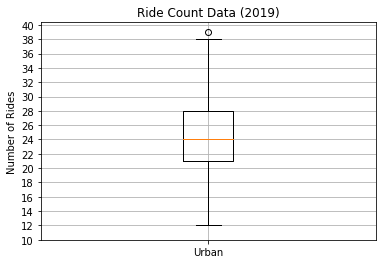

In [62]:
# Create a box-and-whisker plot for urban cities ride count

x_labels = ["Urban"]

fig, ax = plt.subplots()

ax.boxplot(urban_ride_count, labels=x_labels)

ax.set_title("Ride Count Data (2019)")

ax.set_ylabel("Number of Rides")

ax.set_yticks(np.arange(10, 41, step=2.0))

ax.grid()

plt.show()

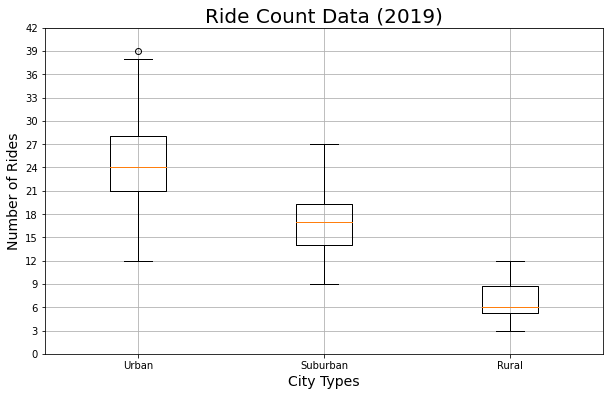

In [63]:
x_labels = ["Urban", "Suburban", "Rural"]

ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]

fig, ax = plt.subplots(figsize=(10, 6))

ax.set_title("Ride Count Data (2019)", fontsize=20)

ax.set_ylabel("Number of Rides", fontsize=14)

ax.set_xlabel("City Types", fontsize=14)

ax.boxplot(ride_count_data, labels=x_labels)

ax.set_yticks(np.arange(0, 45, step=3.0))

ax.grid(True)

plt.savefig("analysis/Fig2.png")

plt.show()

In [64]:
# Get the city for the outlier

urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]

print(f'{urban_city_outlier} has the highest rider count.')

West Angela has the highest rider count.


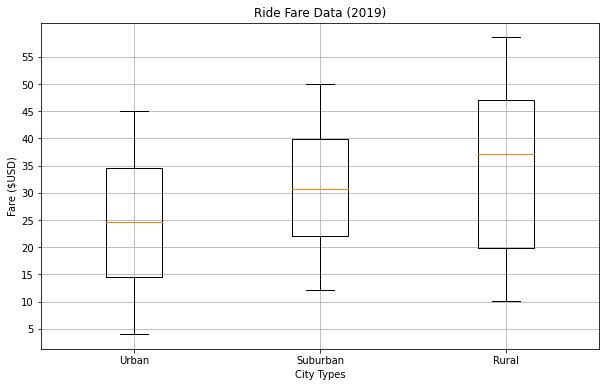

In [67]:
# Box-and-whisker for fare data

x_labels = ["Urban", "Suburban", "Rural"]

fare_data = [urban_fares, suburban_fares, rural_fares]

fig, ax = plt.subplots(figsize=(10, 6))

ax.set_title("Ride Fare Data (2019)")

ax.set_ylabel("Fare ($USD)")

ax.set_xlabel("City Types")

ax.set_yticks(np.arange(0, 56, step=5.0))

ax.boxplot(fare_data, labels=x_labels)

ax.grid()

plt.savefig("analysis/Fig3.png")

plt.show()



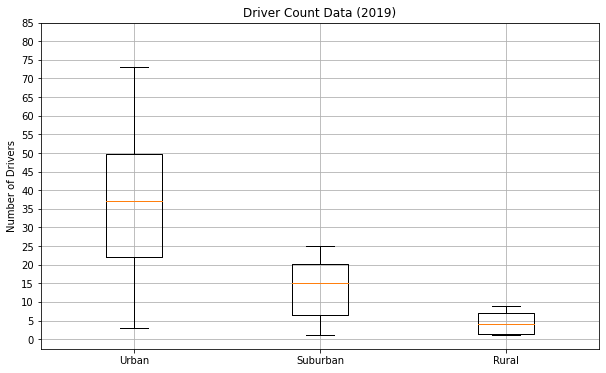

In [69]:
# Box-and-whisker plot for driver count data

x_labels = ["Urban", "Suburban", "Rural"]

driver_data = [urban_driver_count, suburban_driver_count, rural_driver_count]

fig, ax = plt.subplots(figsize=(10, 6))

ax.boxplot(driver_data, labels=x_labels)

ax.set_title("Driver Count Data (2019)")

ax.set_ylabel("Number of Drivers")

ax.set_yticks(np.arange(0, 90, step=5.0))

ax.grid()

plt.savefig("analysis/Fig4.png")

plt.show()

In [71]:
# Get sum of fares by city type

sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]

sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [72]:
total_fares = pyber_data_df["fare"].sum()

total_fares

63538.64

In [73]:
type_percents = 100 * pyber_data_df.groupby(["type"]).sum()["fare"] / pyber_data_df["fare"].sum()

type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

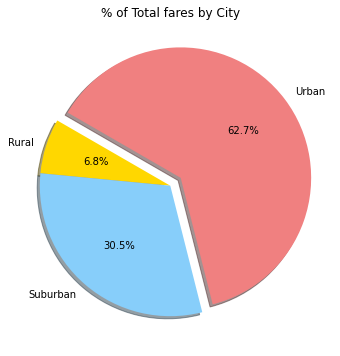

In [74]:
# import mpl to change the plot configurations using rcParams

import matplotlib as mpl

# Pie Chart

plt.subplots(figsize=(10, 6))

plt.pie(type_percents,
        labels=["Rural", "Suburban", "Urban"],
        colors=["gold", "lightskyblue", "lightcoral"],
        explode=[0, 0, 0.1],
        autopct='%1.1f%%',
        shadow=True,
        startangle=150)

plt.title("% of Total fares by City")

mpl.rcParams['font.size'] = 14

plt.savefig("analysis/Fig5.png")

plt.show()

In [75]:
ride_count_by_type = pyber_data_df.groupby(["type"]).count()["ride_id"]

ride_count_by_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [78]:
total_ride_count = pyber_data_df["ride_id"].count()

total_ride_count

2375

In [77]:
ride_percents = 100 * ride_count_by_type / total_ride_count

ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

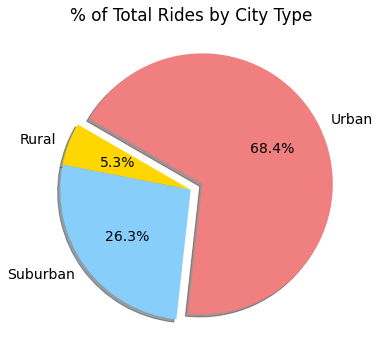

In [80]:
# Ride Count Pie Chart

plt.subplots(figsize=(10, 6))

plt.pie(ride_percents,
        labels=["Rural", "Suburban", "Urban"],
        colors=["gold", "lightskyblue", "lightcoral"],
        explode=[0, 0, 0.1],
        autopct='%1.1f%%',
        shadow=True,
        startangle=150)

plt.title("% of Total Rides by City Type")

mpl.rcParams['font.size'] = 14

plt.savefig("analysis/Fig6.png")

plt.show()

In [86]:
driver_percents = 100 * city_data_df.groupby(["type"]).sum()["driver_count"] / city_data_df["driver_count"].sum()

driver_percents

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

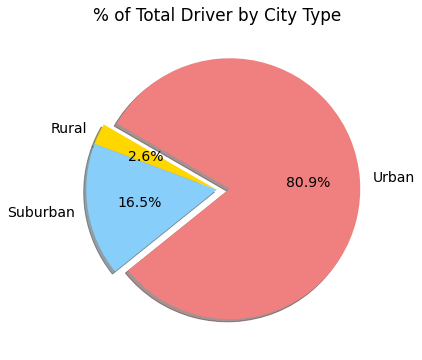

In [87]:
# Total Drivers pie chart

plt.subplots(figsize=(10, 6))

plt.pie(driver_percents,
        labels = ["Rural", "Suburban", "Urban"],
        colors=["gold", "lightskyblue", "lightcoral"],
        explode=[0, 0, 0.1],
        autopct='%1.1f%%',
        shadow=True,
        startangle=150)

plt.title("% of Total Driver by City Type")

mpl.rcParams['font.size'] = 14

plt.savefig("analysis/Fig7.png")

plt.show()